In [28]:
import xgboost as xgb
import matplotlib as mpl
import sklearn

In [19]:
train = xgb.DMatrix('./data/train/train_libsvm.txt')
test = xgb.DMatrix('./data/test/test_libsvm.txt')
print train.num_row(), train.num_col(), test.num_row(), test.num_col()

11940760 7158 970902 7158


In [ ]:
# CPU times: user 4h 10s, sys: 9.43 s, total: 4h 19s
# Wall time: 48min 22s
param = {'max_depth':6, 'eta':0.05, 'silent':1, 'objective':'binary:logistic', 'min_child_weight':10, 
         'eval_metric':'auc', 'subsample': 1.0, 'colsample_bytree': 0.8, 'booster':'gbtree', 'nthread': 8,
         'tree_method': 'exact'}
n_trees = 500
watchlist  = [(train,'train'), (test,'eval')]
%time bst = xgb.train(param, train, n_trees, watchlist)
bst.save_model('./data/model/xgboost_exact.model')

In [ ]:
# CPU times: user 4h 1s, sys: 10.2 s, total: 4h 11s
# Wall time: 48min 35s
param = {'max_depth':6, 'eta':0.05, 'silent':1, 'objective':'binary:logistic', 'min_child_weight':10, 
         'eval_metric':'auc', 'subsample': 1.0, 'colsample_bytree': 0.8, 'booster':'gbtree', 'nthread': 8,
         'tree_method': 'approx'}
n_trees = 500
watchlist  = [(train,'train'), (test,'eval')]
%time bst = xgb.train(param, train, n_trees, watchlist)
bst.save_model('./data/model/xgboost_approx.model')

In [ ]:
# CPU times: user 49min 2s, sys: 1.1 s, total: 49min 3s
# Wall time: 12min 50s
param = {'max_depth':6, 'eta':0.05, 'silent':1, 'objective':'binary:logistic', 'min_child_weight':10, 
         'eval_metric':'auc', 'subsample': 1.0, 'colsample_bytree': 0.8, 'booster':'gbtree', 'nthread': 8,
         'tree_method': 'hist'}
n_trees = 500
watchlist  = [(train,'train'), (test,'eval')]
%time bst = xgb.train(param, train, n_trees, watchlist)
bst.save_model('./data/model/xgboost_hist.model')

In [ ]:
# CPU times: user 4h 36min 28s, sys: 6.07 s, total: 4h 36min 34s
# Wall time: 45min 4s
param = {'max_depth':0, 'eta':0.05, 'silent':1, 'objective':'binary:logistic', 'min_child_weight':10, 
         'eval_metric':'auc', 'subsample': 1.0, 'colsample_bytree': 0.8, 'booster':'gbtree', 'nthread':8,
         'tree_method':'hist', 'grow_policy':'lossguide', 'max_leaves':255}
n_trees = 500
watchlist  = [(train,'train'), (test,'eval')]
%time bst = xgb.train(param, train, n_trees, watchlist)
bst.save_model('./data/model/xgboost_hist1.model')

In [ ]:
# CPU times: user 4h 56min 29s, sys: 9.1 s, total: 4h 56min 38s
# Wall time: 45min 2s
param = {'max_depth':0, 'eta':0.05, 'silent':1, 'objective':'binary:logistic', 'min_child_weight':10, 
         'eval_metric':'auc', 'subsample': 1.0, 'colsample_bytree': 0.8, 'booster':'gbtree', 'nthread':8,
         'tree_method':'hist', 'grow_policy':'lossguide', 'max_leaves':511}
n_trees = 350 # starts overfitting after 350 iterations
watchlist  = [(train,'train'), (test,'eval')]
%time bst = xgb.train(param, train, n_trees, watchlist)
bst.save_model('./data/model/xgboost_hist2.model')

In [41]:
bst.load_model('./data/model/xgboost_exact.model')
prob_exact = bst.predict(test)
bst.load_model('./data/model/xgboost_approx.model')
prob_approx = bst.predict(test)
bst.load_model('./data/model/xgboost_hist.model')
prob_hist = bst.predict(test)
bst.load_model('./data/model/xgboost_hist1.model')
prob_hist1 = bst.predict(test)
bst.load_model('./data/model/xgboost_hist2.model')
prob_hist2 = bst.predict(test)

In [42]:
y_test = sklearn.datasets.load_svmlight_file('./data/test/test_libsvm.txt')[1]

In [53]:
print round(sklearn.metrics.roc_auc_score(y_test, prob_exact),4)
print round(sklearn.metrics.roc_auc_score(y_test, prob_approx),4)
print round(sklearn.metrics.roc_auc_score(y_test, prob_hist),4)
print round(sklearn.metrics.roc_auc_score(y_test, prob_hist1),4)
print round(sklearn.metrics.roc_auc_score(y_test, prob_hist2),4)

0.7321
0.7321
0.732
0.7494
0.7497


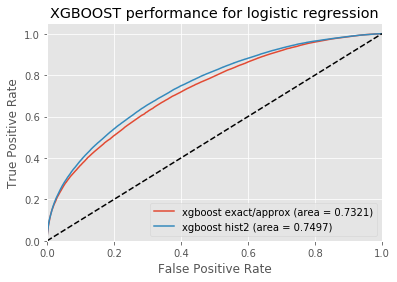

In [54]:
from sklearn.metrics import roc_curve, auc
mpl.style.use('ggplot')
fpr_exact, tpr_exact, _ = roc_curve(y_test, prob_exact)
roc_auc_exact = auc(fpr_exact, tpr_exact)
fpr_hist2, tpr_hist2, _ = roc_curve(y_test, prob_hist2)
roc_auc_hist2 = auc(fpr_hist2, tpr_hist2)
%matplotlib inline
mpl.pyplot.plot(fpr_exact, tpr_exact, label='xgboost exact/approx (area = %0.4f)' % roc_auc_exact)
mpl.pyplot.plot(fpr_hist2, tpr_hist2, label='xgboost hist2 (area = %0.4f)' % roc_auc_hist2)
mpl.pyplot.plot([0, 1], [0, 1], 'k--')
mpl.pyplot.xlim([0.0, 1.0])
mpl.pyplot.ylim([0.0, 1.05])
mpl.pyplot.xlabel('False Positive Rate')
mpl.pyplot.ylabel('True Positive Rate')
mpl.pyplot.title('XGBOOST performance for logistic regression')
mpl.pyplot.legend(loc="lower right")